In [52]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.gridspec as gridspec

from matplotlib import cm

target_colors=['#8b324d','#387149']

In [53]:
df = pd.read_csv('/kaggle/input/test-data/test.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

# Target Distribution:

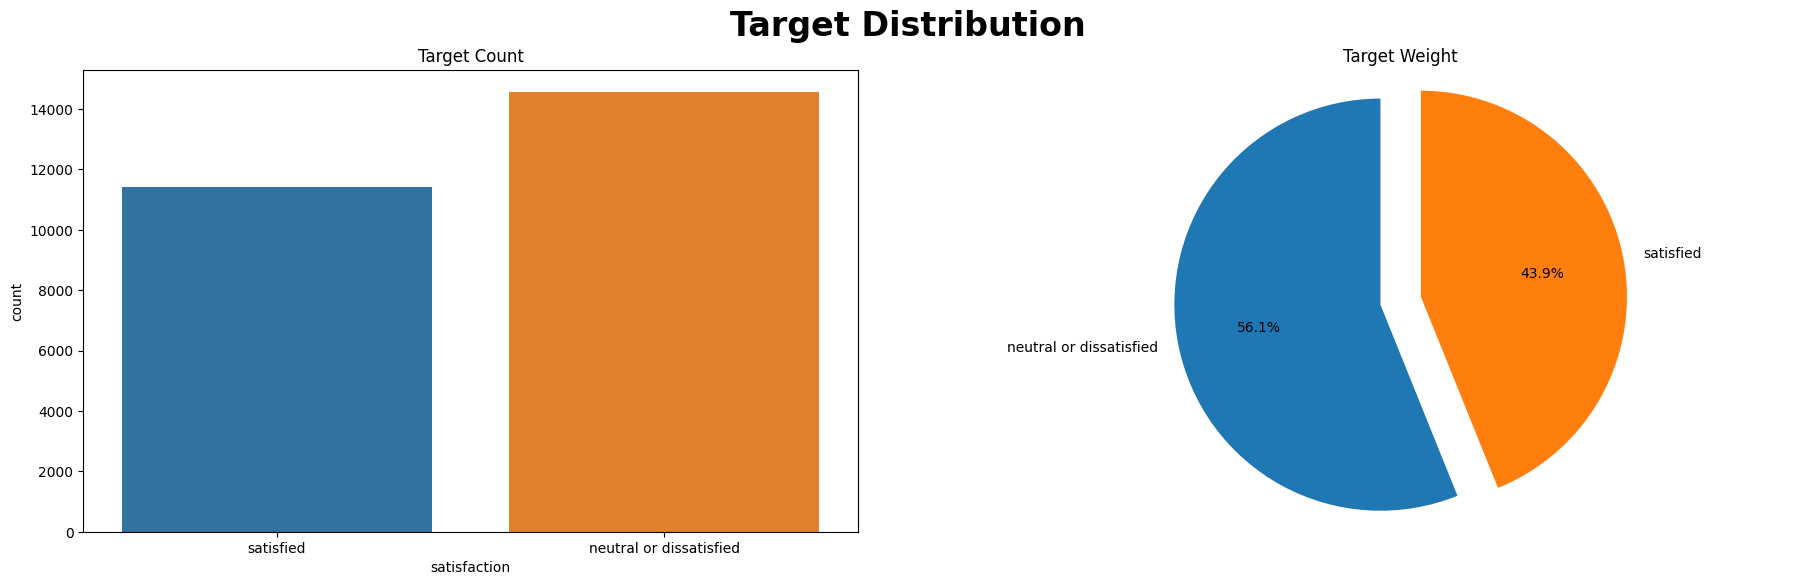

In [55]:
#Define the figure
fig=plt.figure(figsize=(22,6))
plt.suptitle('Target Distribution',weight='bold',fontsize=24,fontname='moonspace')
grid=gridspec.GridSpec(nrows=1,ncols=2,figure=fig)
#Creat your sub plot by defining axis
ax1=fig.add_subplot(grid[0, :1])
ax1.set_title('Target Count')
#With help of seaborn,we are drawing the countplot
sns.countplot(x='satisfaction',data=df,ax=ax1)
#to remove the border of the plot
#for spine in ax1.spines.values():
#spine.set_visible(False)
    
 #to dissapear the y axis
#ax1.get_yaxis().set_visible(False)

#for index,value in enumerate(df['satisfaction'].value_counts()):
    #ax1.annotate(value,xy=(index,value+3500),ha='center',va='center',fontsize=12)
 #make xlable little big  
#ax1.set_xticklabels(df['satisfaction'].value_counts().index,fontsize=15)

#Second subplot
ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight')
label=list(df['satisfaction'].value_counts().index)
value=list(df['satisfaction'].value_counts().values)
#pie chart
ax2.pie(value,labels=label,autopct='%1.1f%%',explode=(0,0.2),startangle=90)
ax2.axis('equal')
plt.show()

# Passenger Profile

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


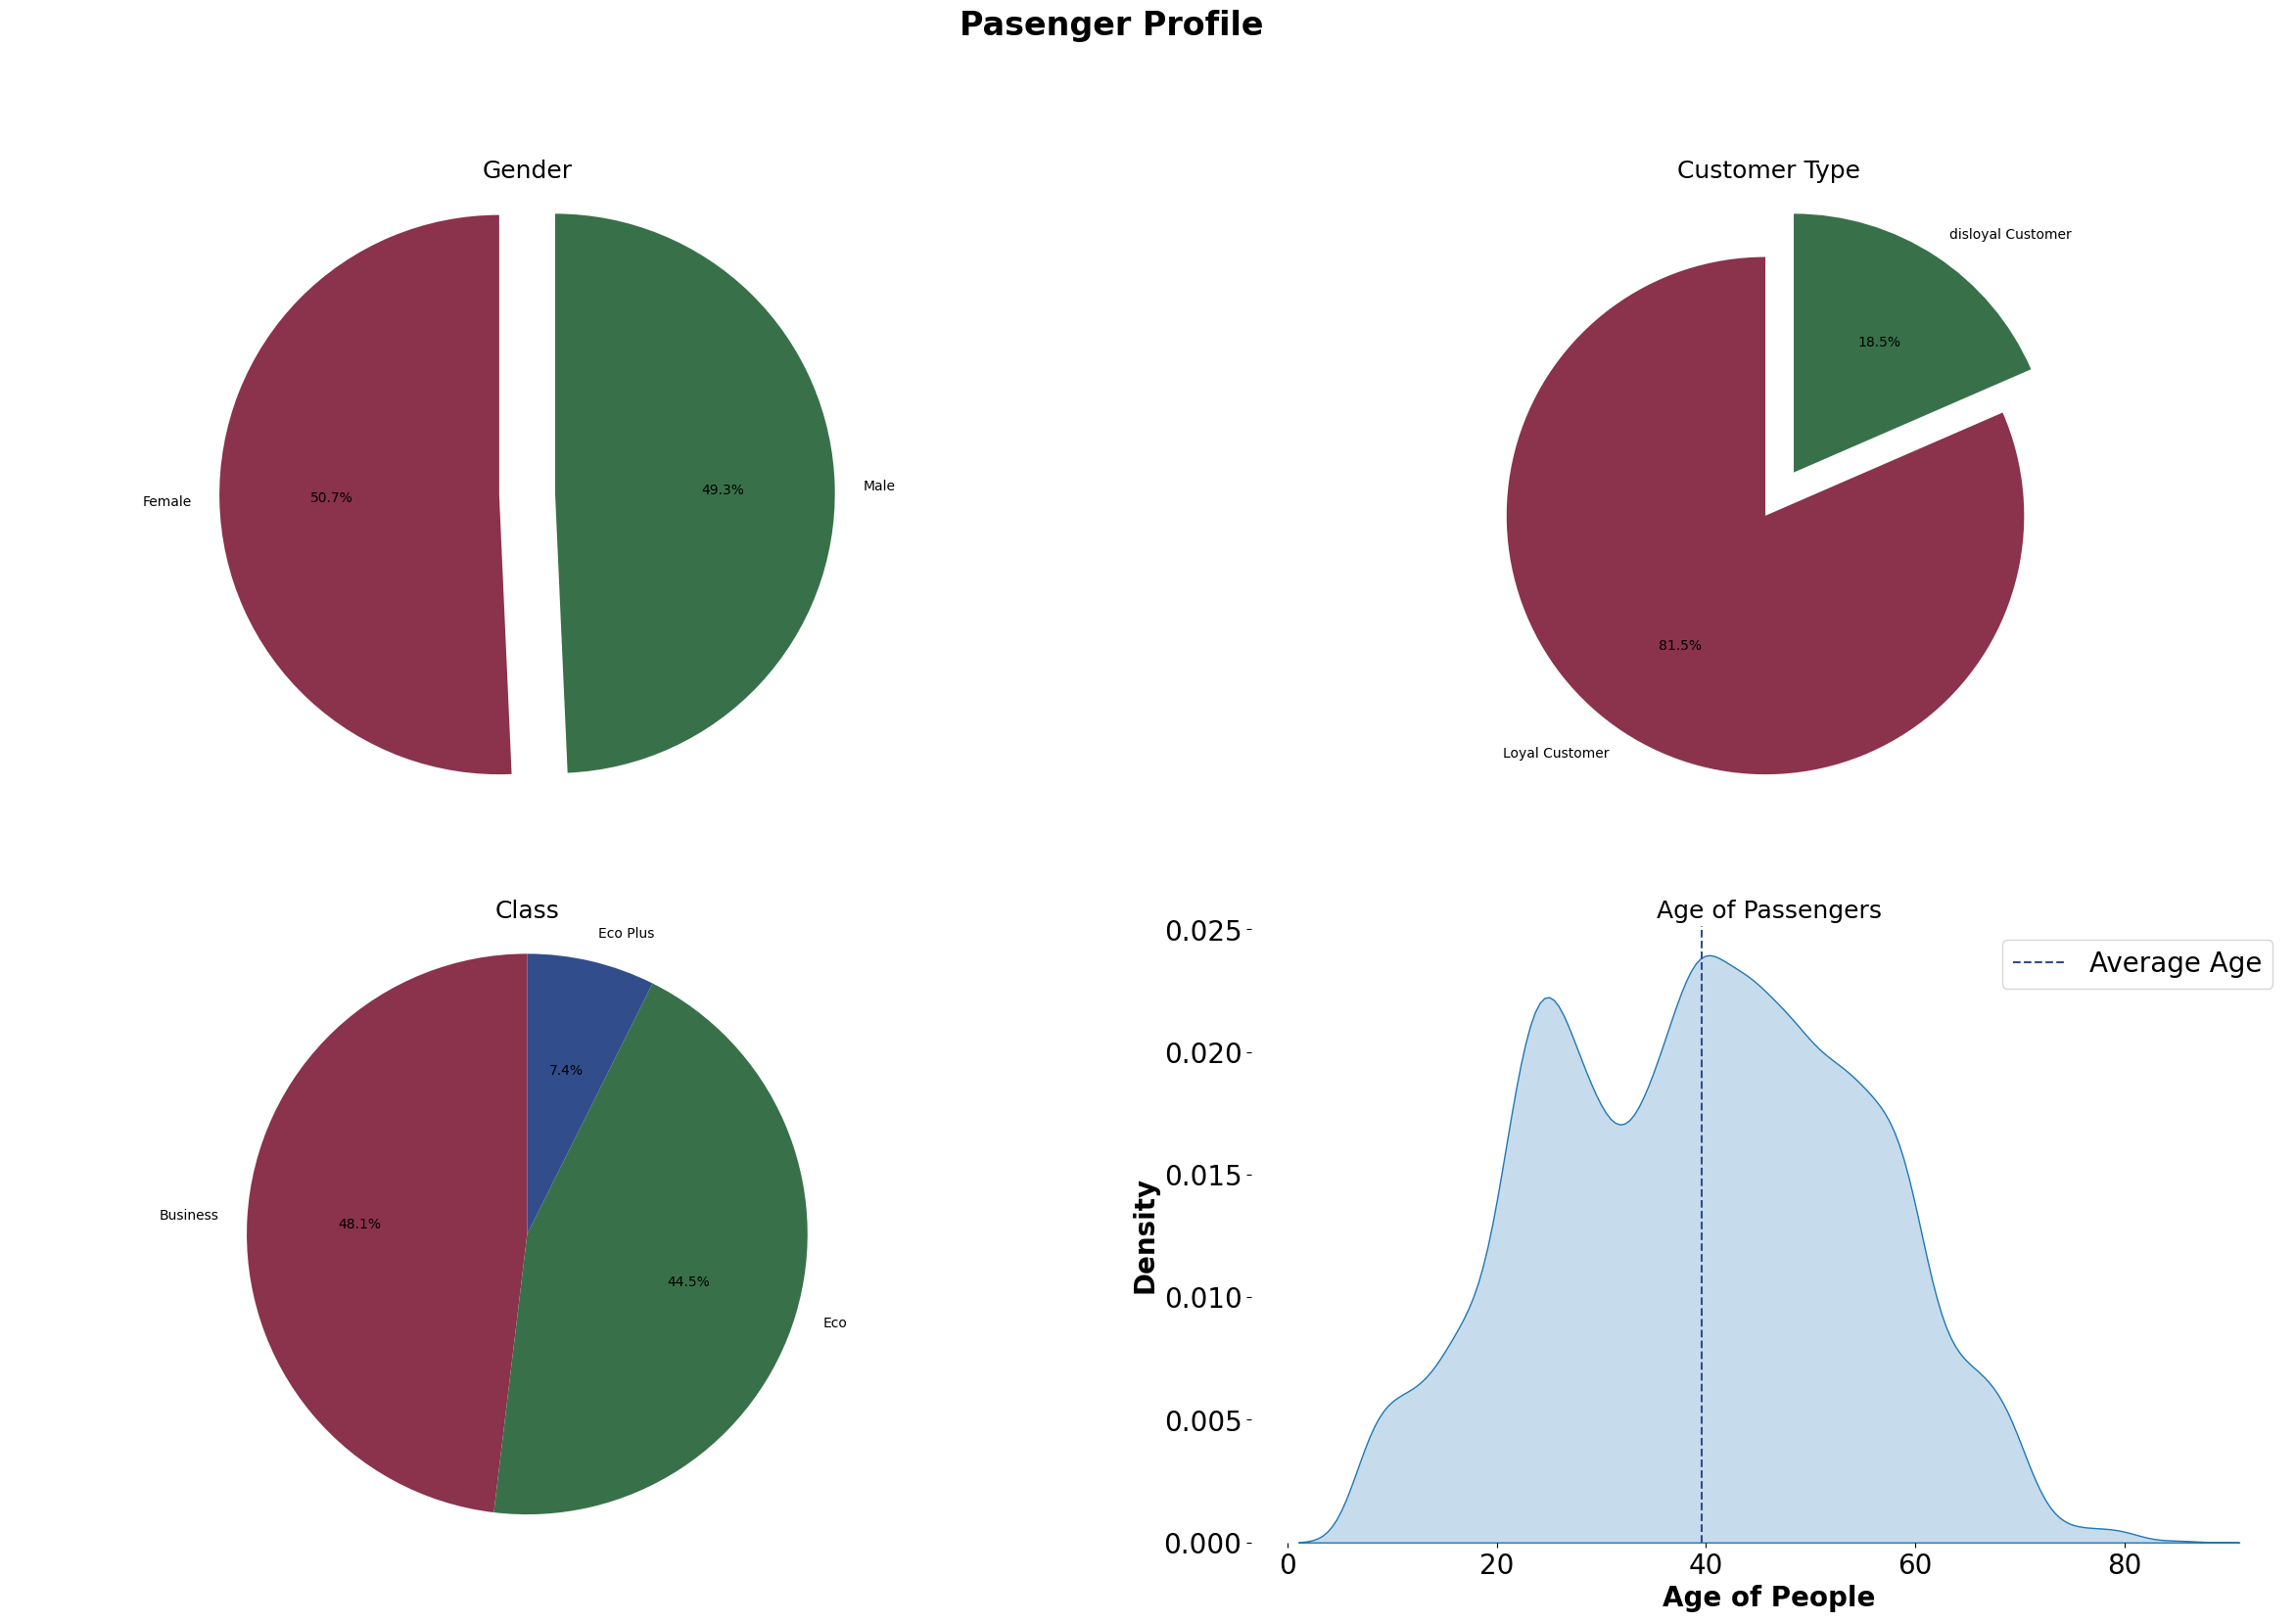

In [56]:
#gender,#type of travel,#class,#age of people

fig=plt.figure(figsize=(30,18))
plt.suptitle('Pasenger Profile',weight='bold',fontsize=24,fontname='moonspace')
grid=gridspec.GridSpec(nrows=2,ncols=2,figure=fig)
#create your first subplot by defining axis
ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Gender',fontsize=18)

label=list(df['Gender'].value_counts().index)
value=list(df['Gender'].value_counts().values)
#pie chart
ax1.pie(value,labels=label,autopct='%1.1f%%',explode=(0,0.2),startangle=90,colors=target_colors)
ax1.axis('equal')

ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Customer Type',fontsize=18)

label=list(df['Customer Type'].value_counts().index)
value=list(df['Customer Type'].value_counts().values)
#pie chart
ax2.pie(value,labels=label,autopct='%1.1f%%',explode=(0,0.2),startangle=90,colors=target_colors)
ax2.axis('equal')




ax3=fig.add_subplot(grid[1,:1])
ax3.set_title('Class',fontsize=18)

label=list(df['Class'].value_counts().index)
value=list(df['Class'].value_counts().values)
#pie chart
ax3.pie(value,labels=label,autopct='%1.1f%%',startangle=90,colors=target_colors+['#324D8B'])
ax3.axis('equal')

ax4=fig.add_subplot(grid[1,1:])
ax4.set_title('Age of Passengers',fontsize=18)

sns.kdeplot(df['Age'],ax=ax4,fill=True)

#change the tick size
ax4.tick_params(axis='x',labelsize=20)
ax4.tick_params(axis='y',labelsize=20)

#change the label size
ax4.set_xlabel('Age of People',fontsize=20,weight='bold')
ax4.set_ylabel('Density',fontsize=20,weight='bold')

for spine in ax4.spines.values():
    spine.set_visible(False)

ax4.axvline(df['Age'].mean(),linestyle='--',color='#324D8B',label='Average Age')
ax4.legend(fontsize=20)

plt.show()


In [57]:
df=pd.read_csv('/kaggle/input/test-data/test.csv')

df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
# Define target_colors (Replace with your actual palette if needed) 
target_colors = {'satisfied': 'blue', 'dissatisfied': 'red'}

In [58]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [59]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [60]:
df.shape

(25976, 25)

In [61]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [62]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [63]:
df.nunique()

Unnamed: 0                           25976
id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Del

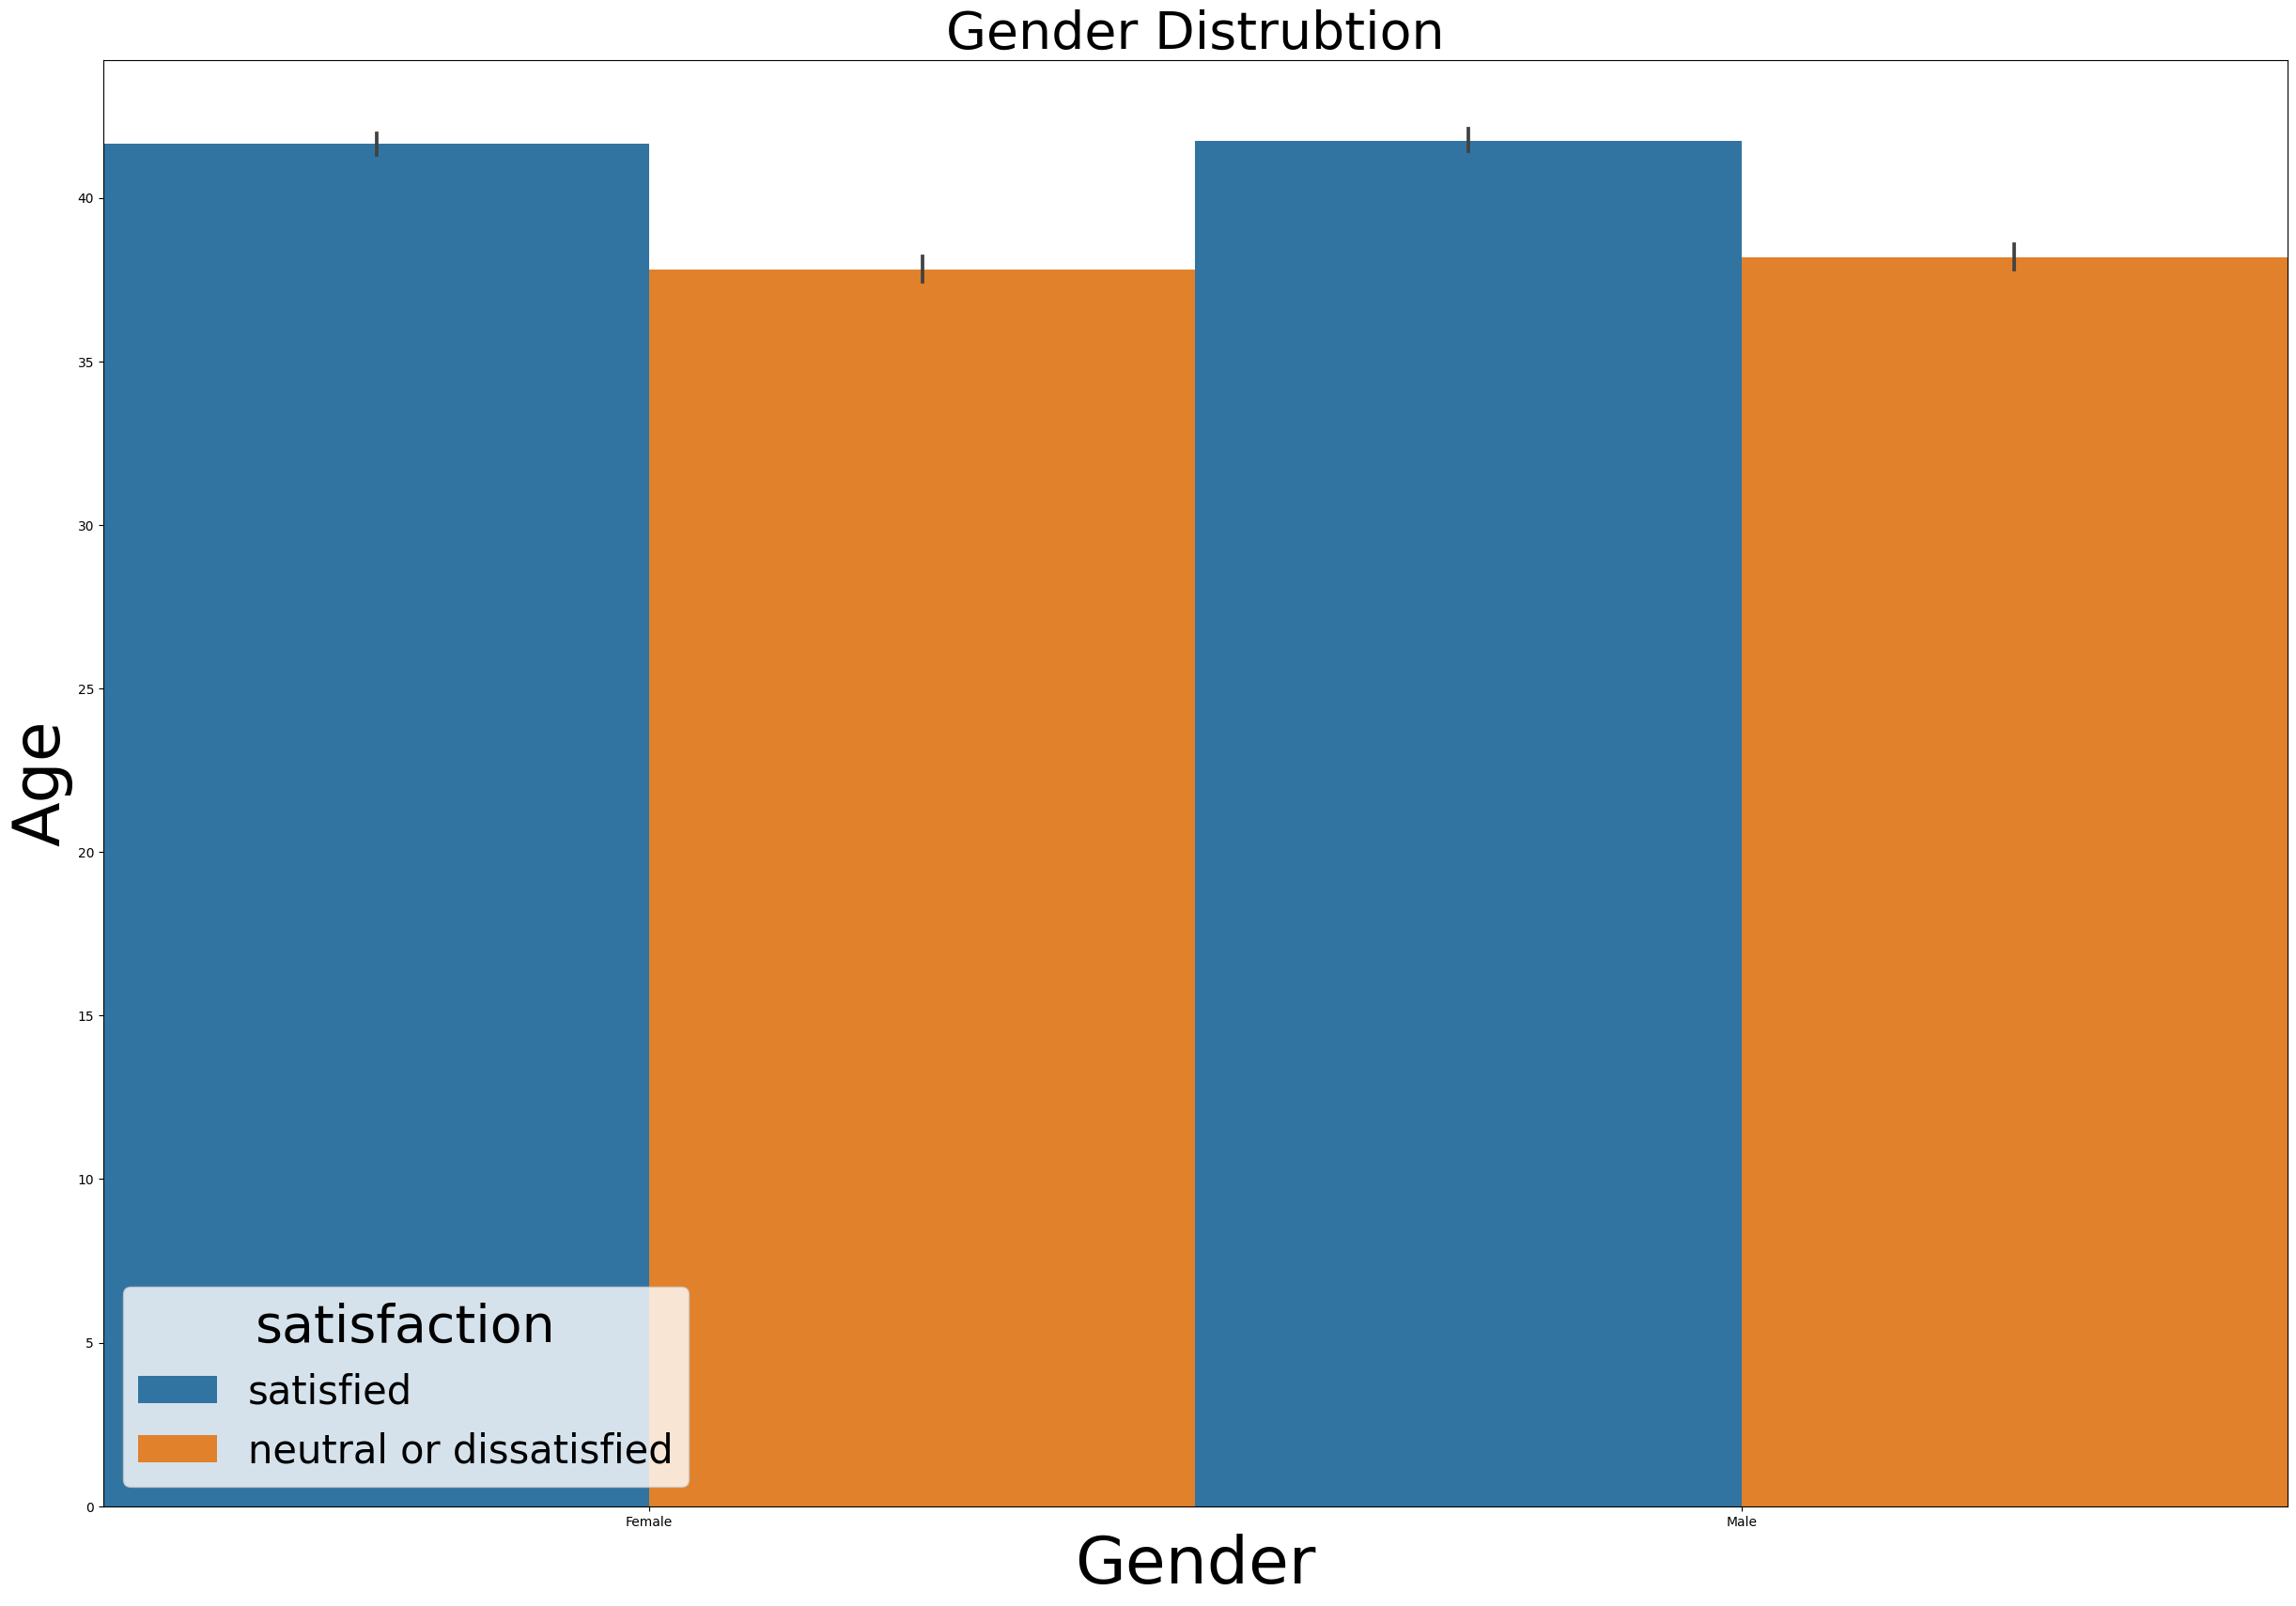

In [64]:
plt.figure(figsize=(30,20))
sns.barplot(x='Gender',y='Age',hue='satisfaction',width=1,data=df)
plt.legend(title='satisfaction',title_fontsize="40",fontsize="30")
plt.title("Gender Distrubtion",size=40)
plt.ylabel("Age",size=50)
plt.xlabel("Gender",size=50)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


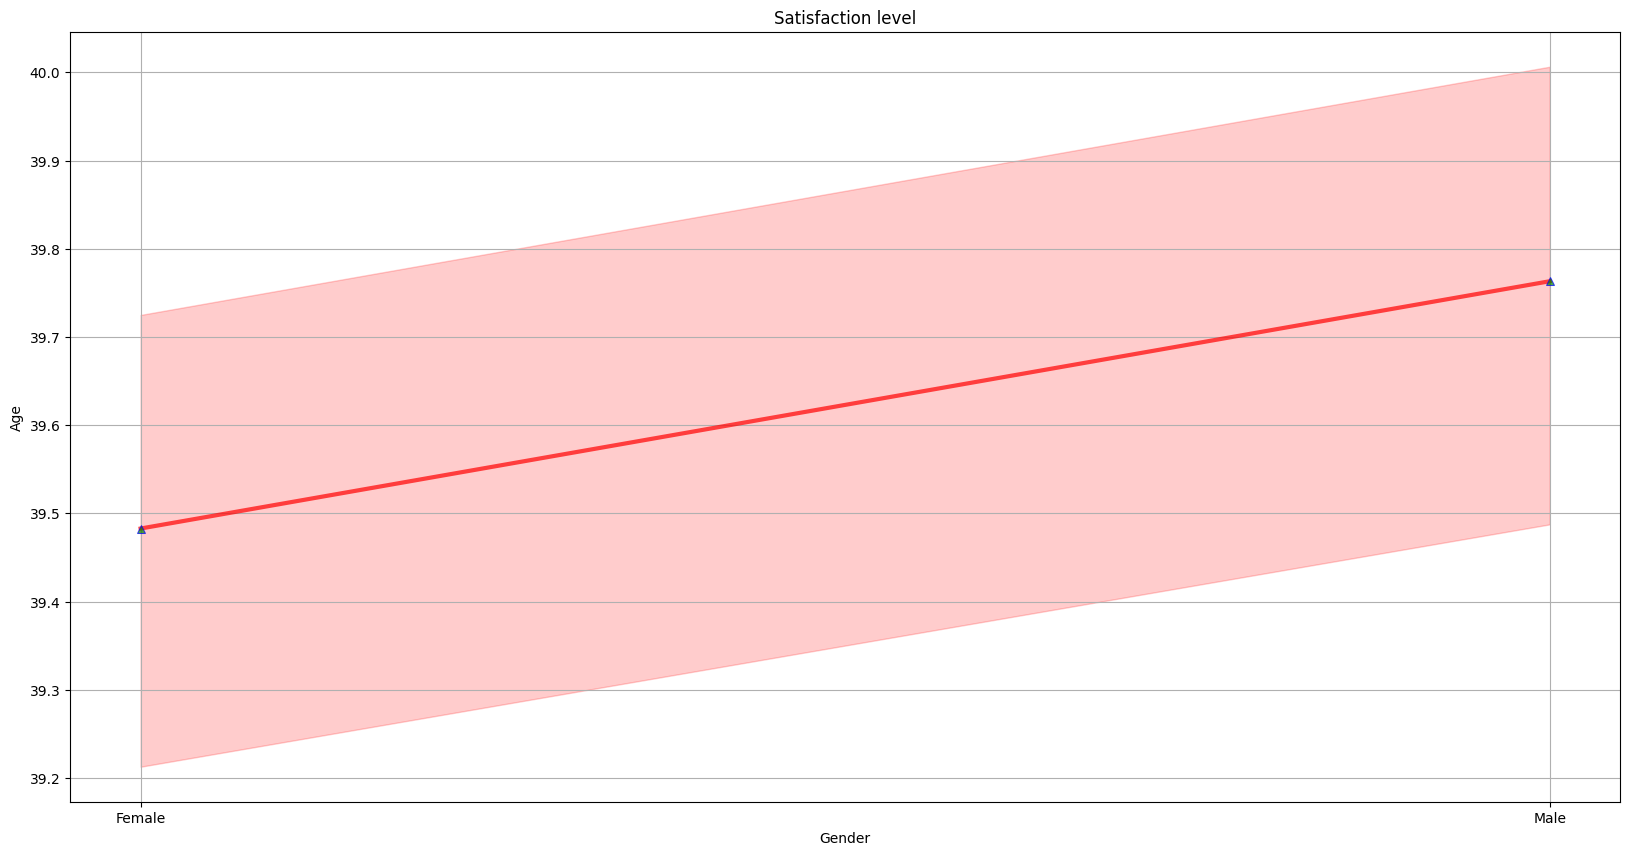

In [65]:
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
plt.figure(figsize=(20,10))
sns.lineplot(y='Age',x='Gender',c="r",marker="^",mfc="g",mec="b",data=df,alpha=0.7,lw=3)
plt.title("Satisfaction level")
plt.grid()
plt.show()

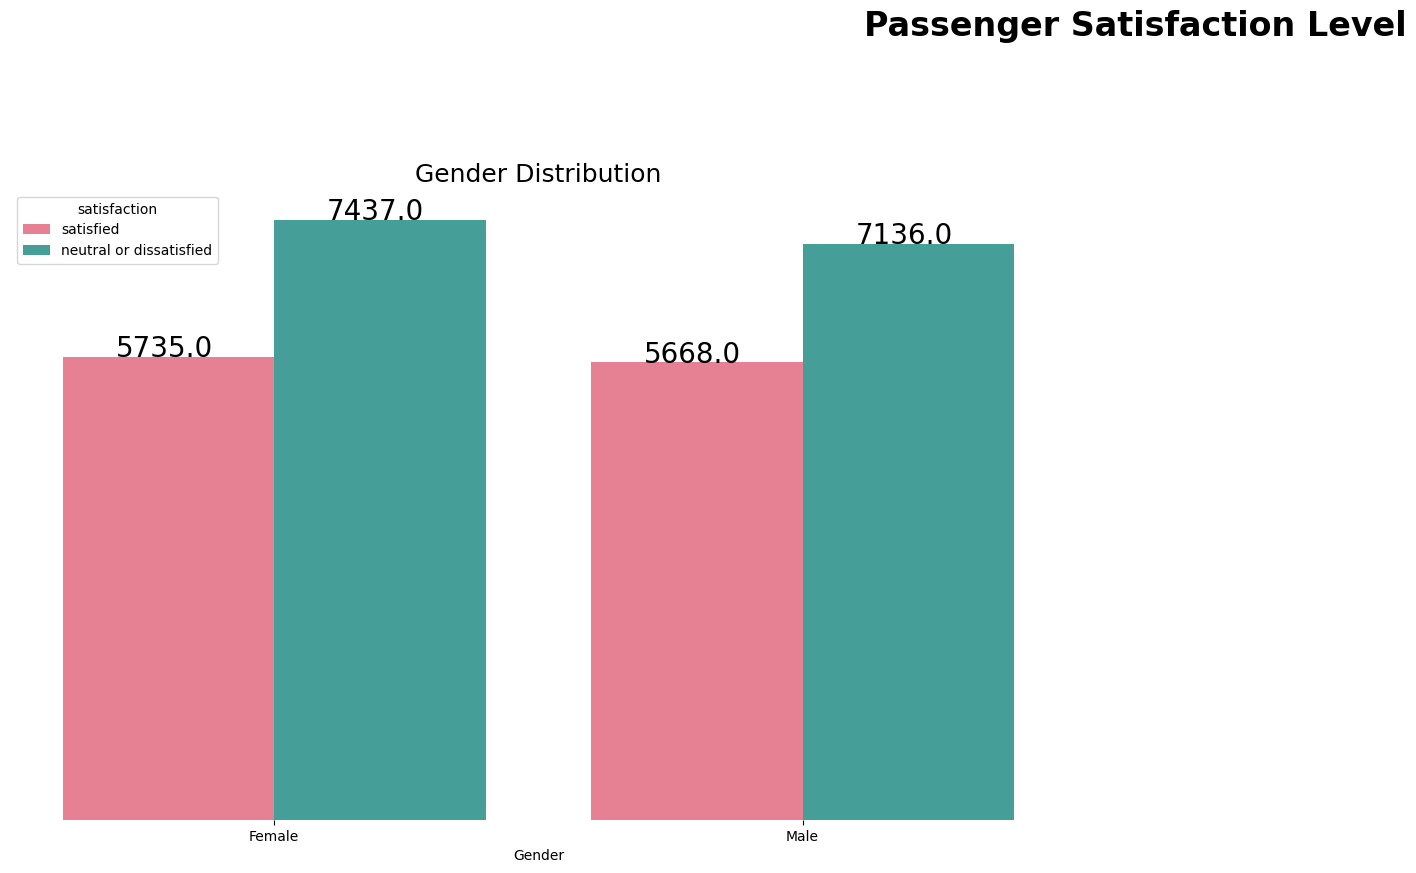

In [66]:


# Dynamically create the target_colors dictionary
unique_satisfaction = df['satisfaction'].unique()
color_palette = sns.color_palette("husl", len(unique_satisfaction))  # Generate a color palette with unique colors
target_colors = dict(zip(unique_satisfaction, color_palette))

fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Satisfaction Level', weight='bold', fontsize=24, fontname='moonspace')
grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

# Create your first subplot by defining axis
ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Gender Distribution', fontsize=18)
sns.countplot(x=df['Gender'], hue=df['satisfaction'], ax=ax1, palette=target_colors)

for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 0.5), fontsize=20)

# Turn off the y-axis
ax1.get_yaxis().set_visible(False)
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.tick_params(axis='x')

plt.show()


In [67]:
df.dropna(inplace=True)

In [68]:
df.isnull().sum().sum()

0

In [69]:
df.duplicated().sum()

0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25893 non-null  int64  
 1   id                                 25893 non-null  int64  
 2   Gender                             25893 non-null  object 
 3   Customer Type                      25893 non-null  object 
 4   Age                                25893 non-null  int64  
 5   Type of Travel                     25893 non-null  object 
 6   Class                              25893 non-null  object 
 7   Flight Distance                    25893 non-null  int64  
 8   Inflight wifi service              25893 non-null  int64  
 9   Departure/Arrival time convenient  25893 non-null  int64  
 10  Ease of Online booking             25893 non-null  int64  
 11  Gate location                      25893 non-null  int64  


In [71]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Data Analytics


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


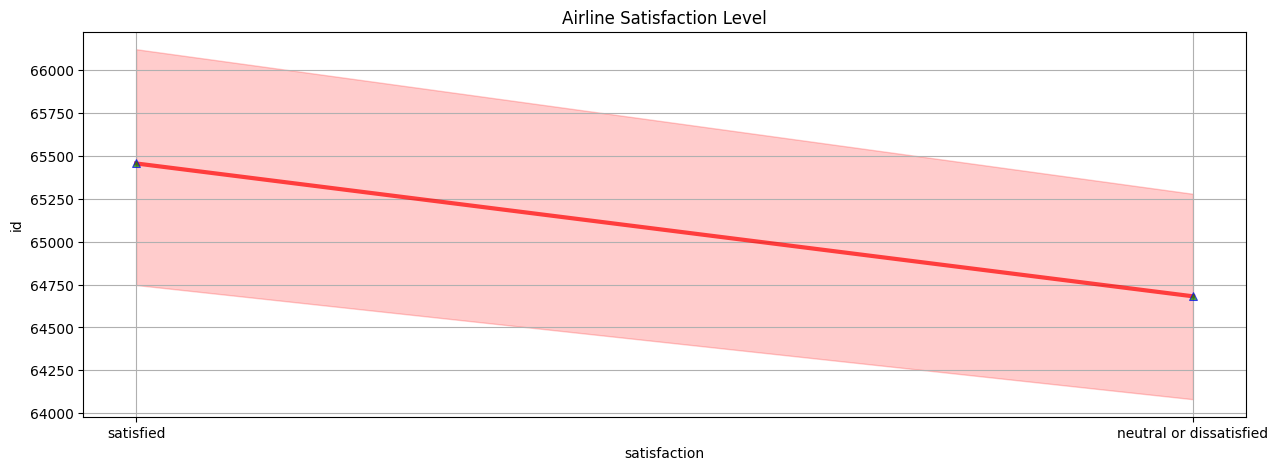

In [72]:
plt.figure(figsize=(15,5))
sns.lineplot(y='id',x='satisfaction',c="r",marker="^",mfc="g",mec="b",data=df,alpha=0.7,lw=3)
plt.title("Airline Satisfaction Level")
plt.grid()
plt.show()

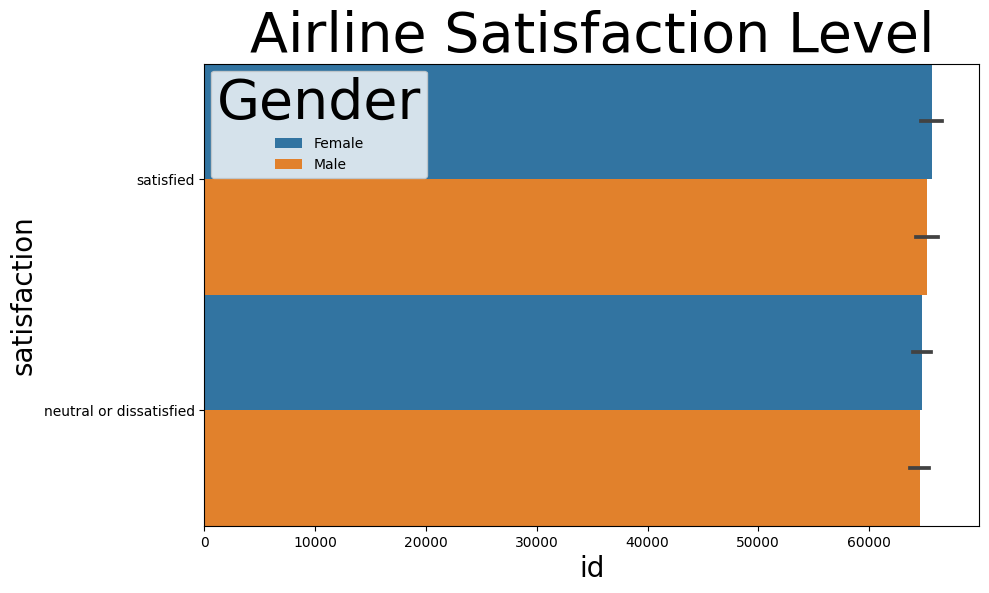

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x='id',y='satisfaction',hue='Gender',width=1,data=df)
plt.legend(title='Gender',title_fontsize="40",fontsize="10")
plt.title("Airline Satisfaction Level",size=40)
plt.ylabel("satisfaction",size=20)
plt.xlabel("id",size=20)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


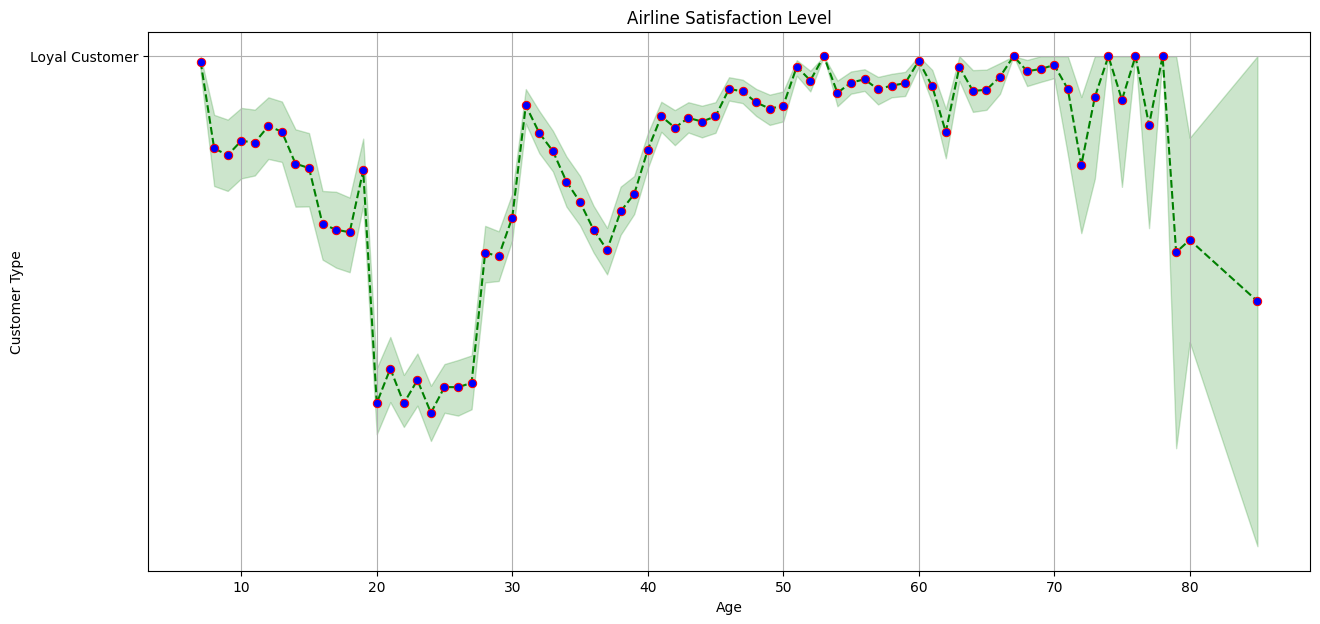

In [74]:
plt.figure(figsize=(15,7))
plt.title("Airline Satisfaction Level")
sns.lineplot(y='Customer Type',x='Age',marker="o",c="g",mfc="b",mec="r",ls="--",data=df)
plt.grid()
plt.show()

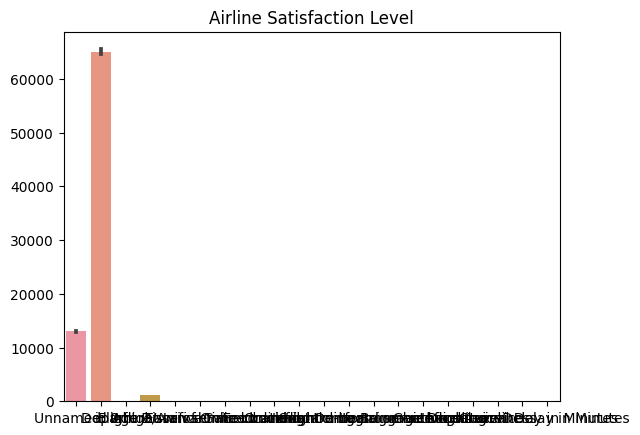

In [75]:
sns.barplot(df)
plt.title("Airline Satisfaction Level")
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


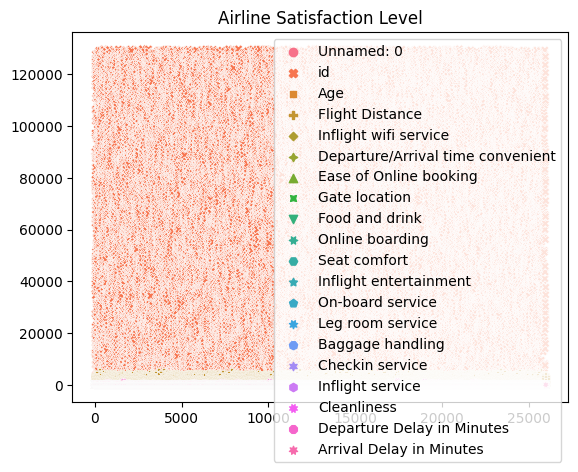

In [76]:
sns.scatterplot(df)
plt.title("Airline Satisfaction Level")
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


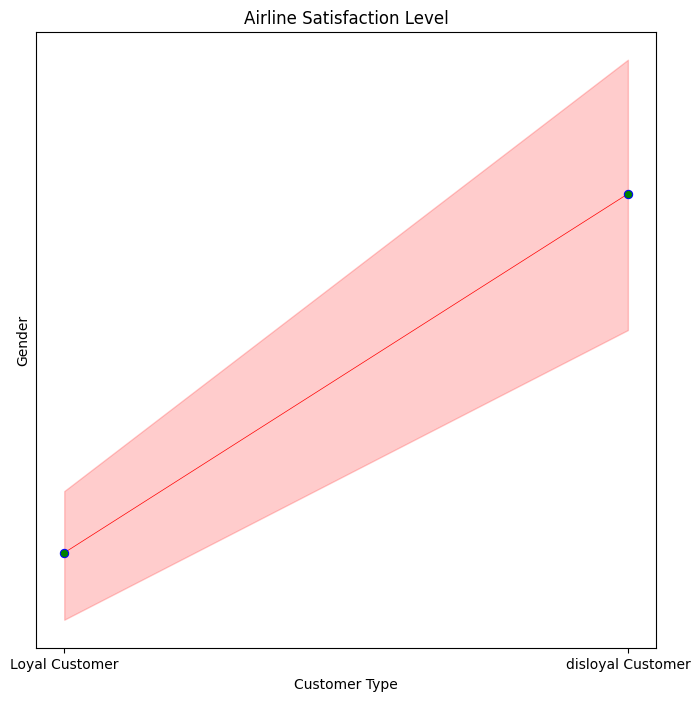

In [77]:
plt.figure(figsize=(8,8))
plt.title("Airline Satisfaction Level")
sns.lineplot(x='Customer Type',y='Gender',c="r",marker="o",mfc="g",mec="b",data=df,alpha=1,lw=0.5)
plt.grid(axis="y")
plt.show()

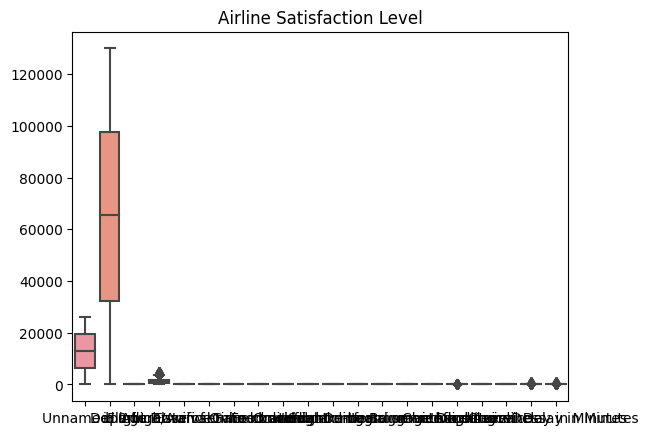

In [78]:
sns.boxplot(df)
plt.title("Airline Satisfaction Level")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


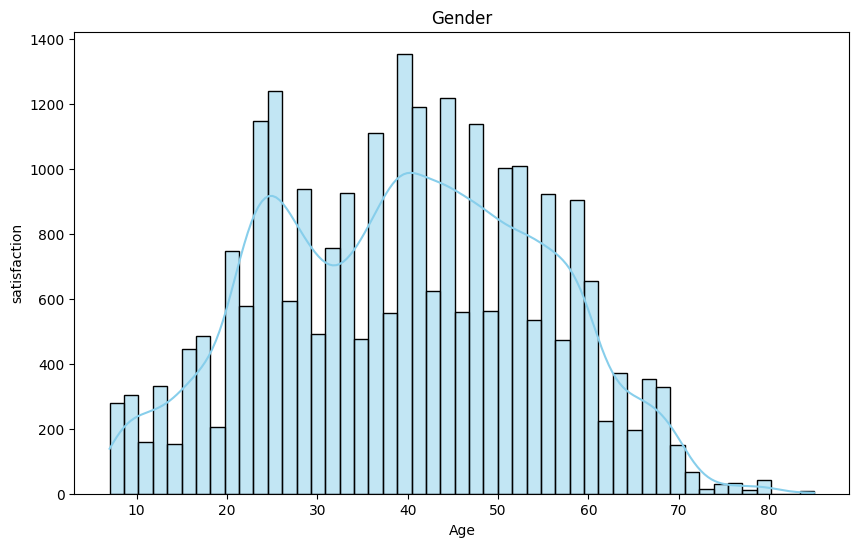

In [79]:
plt.figure(figsize=(10, 6)) 
sns.histplot(df['Age'], kde=True, color='skyblue') 
plt.xlabel('Age') 
plt.ylabel('satisfaction') 
plt.title('Gender') 
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


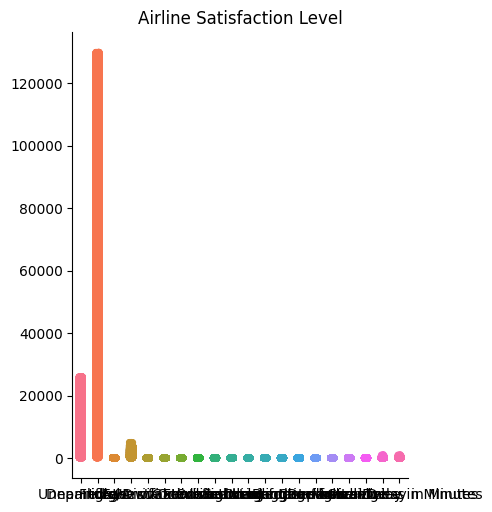

In [80]:
sns.catplot(df)
plt.title('Airline Satisfaction Level')
plt.show()

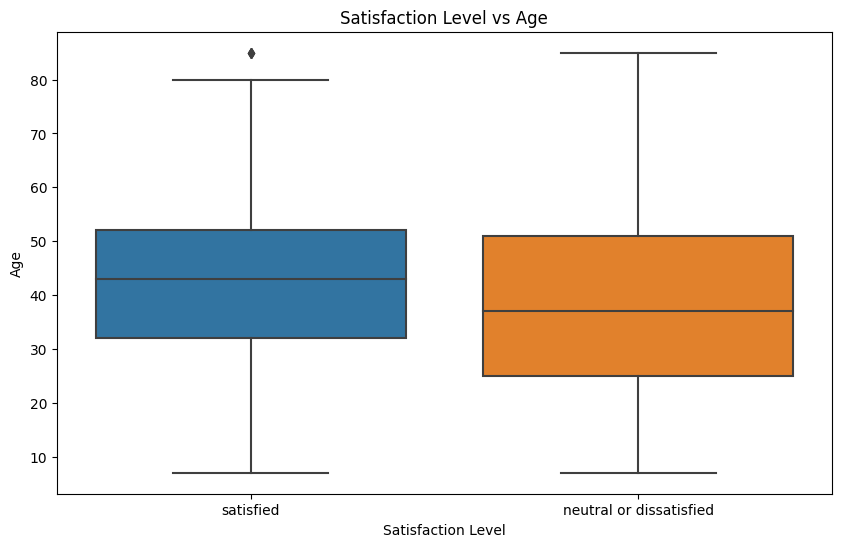

In [81]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='satisfaction', y='Age', data=df) 
plt.xlabel('Satisfaction Level') 
plt.ylabel('Age') 
plt.title('Satisfaction Level vs Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


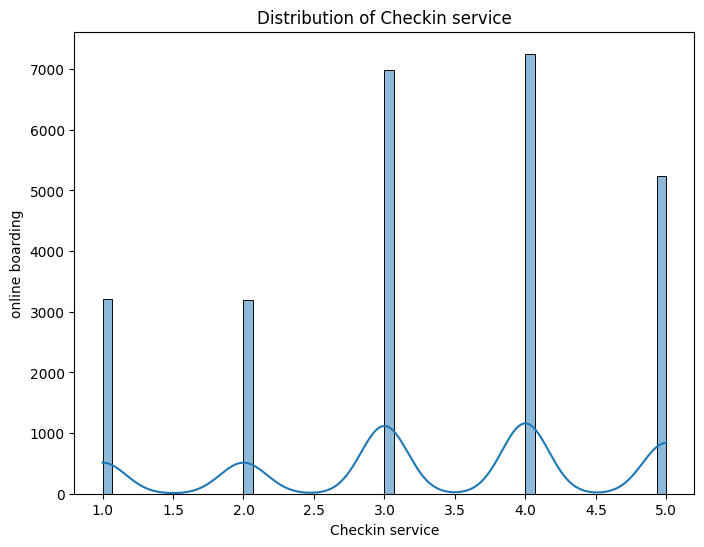

In [82]:
# Plotting a histogram of a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(df['Checkin service'], kde=True)
plt.title("Distribution of Checkin service")
plt.xlabel("Checkin service")
plt.ylabel("online boarding")
plt.show()


# Histogram For Numerical Data

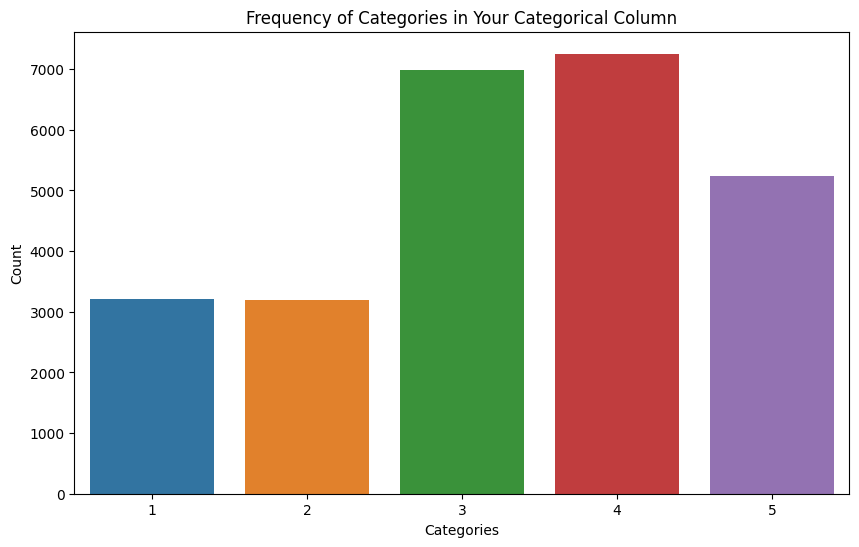

In [83]:
# Bar plot for a categorical column
plt.figure(figsize=(10, 6))
sns.countplot(x='Checkin service', data=df)
plt.title("Frequency of Categories in Your Categorical Column")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()


# Outlier Detection Techniques:

In [84]:
['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [85]:
np.percentile(df ['Flight Distance'],25)
np.percentile(df[ 'Flight Distance'],75)
iqr=np.percentile(df['Flight Distance'],75)-np.percentile(df['Flight Distance'],25)
lower_bound=np.percentile (df['Flight Distance'],25)-(1.5*iqr)
upper_bound=np.percentile(df['Flight Distance'],75)+(1.5*iqr)
print(lower_bound,upper_bound)

-1581.0 3739.0


/tmp/ipykernel_30/1418034595.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Flight Distance'], ax=ax2, shade=True, color='#5e597e')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


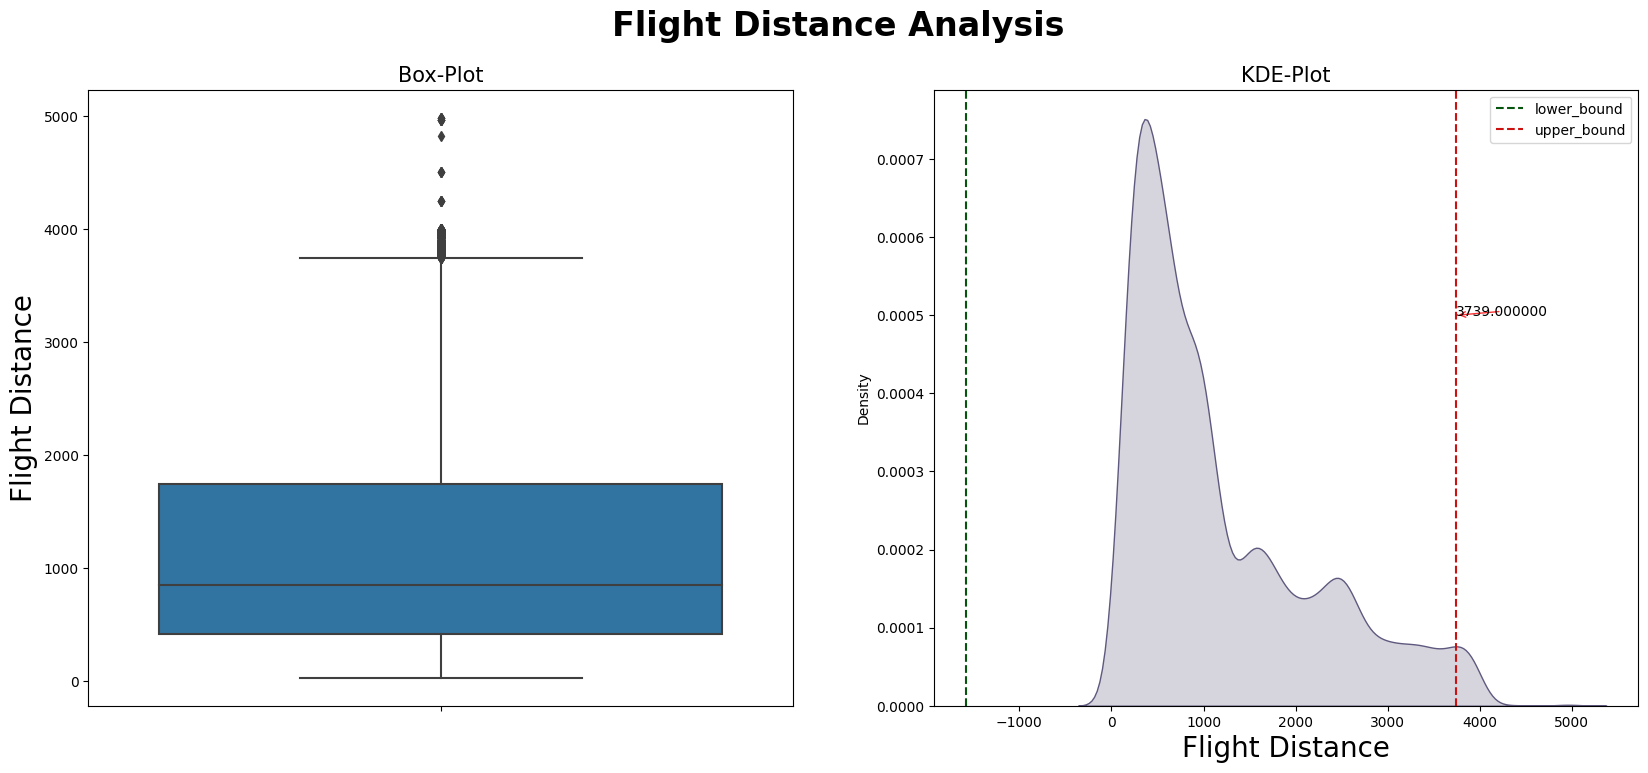

In [86]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))
plt.suptitle('Flight Distance Analysis',fontsize=24,weight='bold')
ax1.set_title('Box-Plot',fontsize=15)
sns.boxplot(y='Flight Distance',data=df,ax=ax1)
ax1.set_ylabel('Flight Distance',fontsize=20)

#kde plot
ax2.set_title('KDE-Plot',fontsize=15)
sns.kdeplot(x=df['Flight Distance'], ax=ax2, shade=True, color='#5e597e')
ax2.axvline(lower_bound,linestyle="--",color='#06550e',label='lower_bound')
ax2.axvline(upper_bound,linestyle="--",color="#cc1111",label='upper_bound')
ax2.legend()
ax2.set_xlabel('Flight Distance',fontsize=20)
ax2.annotate(f'{upper_bound:0f}',xy=(upper_bound,0.0005),arrowprops=dict(arrowstyle="->",color='r',alpha=.8))
plt.show()

In [87]:
def percentile_ate_first_view(data,col,start,end,jump):

    for i in range(start,end,jump):
        var =data[col].values
        var =np.sort(var,axis = None)
        print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
    print("100 percentile value is",var[-1])

percentile_ate_first_view(df,'Flight Distance',0,100,10)


0 percentile value is 31
10 percentile value is 237
20 percentile value is 361
30 percentile value is 488
40 percentile value is 639
50 percentile value is 849
60 percentile value is 1048
70 percentile value is 1512
80 percentile value is 2084
90 percentile value is 2760
100 percentile value is 4983


In [88]:
percentile_ate_first_view(df,'Flight Distance',90,100,1)

90 percentile value is 2760
91 percentile value is 2865
92 percentile value is 2989
93 percentile value is 3112
94 percentile value is 3240
95 percentile value is 3363
96 percentile value is 3491
97 percentile value is 3641
98 percentile value is 3769
99 percentile value is 3889
100 percentile value is 4983


In [89]:
def percentile_at_third_view(data,col):

    for i in np.arange(0.0,1.0,0.1):
        var =data[col].values
        var =np.sort(var,axis = None)
        print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
    print("100 percentile value is",var[-1])

percentile_at_third_view(df,'Flight Distance')


99.0 percentile value is 3889
99.1 percentile value is 3902
99.2 percentile value is 3914
99.3 percentile value is 3927
99.4 percentile value is 3937
99.5 percentile value is 3951
99.6 percentile value is 3960
99.7 percentile value is 3973
99.8 percentile value is 3986
99.9 percentile value is 3997
100 percentile value is 4983


In [90]:

# so to remove outliers from the column we can select a flight distance which are less than 3995
df[df['Flight Distance']>3995]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
273,273,53258,Female,Loyal Customer,57,Business travel,Business,4817,4,4,...,3,3,4,4,5,4,5,0,19.0,satisfied
1590,1590,94129,Female,Loyal Customer,42,Business travel,Business,3998,3,3,...,5,5,5,5,5,5,3,32,34.0,satisfied
1961,1961,3326,Male,Loyal Customer,49,Business travel,Business,3997,4,4,...,5,5,4,5,4,5,5,37,77.0,satisfied
3645,3645,59263,Male,Loyal Customer,44,Business travel,Business,4963,5,5,...,3,3,4,4,4,5,4,0,0.0,satisfied
3795,3795,72042,Female,Loyal Customer,45,Personal Travel,Eco,4243,1,5,...,1,2,3,3,3,2,3,6,0.0,neutral or dissatisfied
3953,3953,59265,Male,Loyal Customer,44,Business travel,Business,4963,5,5,...,3,2,3,4,4,4,4,0,0.0,satisfied
5608,5608,37499,Female,Loyal Customer,25,Business travel,Business,3996,4,3,...,4,1,3,3,2,4,4,0,0.0,neutral or dissatisfied
7851,7851,31874,Female,Loyal Customer,33,Business travel,Business,4983,1,1,...,4,1,4,5,4,3,4,0,0.0,satisfied
8023,8023,58403,Male,Loyal Customer,24,Business travel,Business,3996,2,2,...,4,5,4,4,4,4,4,0,0.0,satisfied
11037,11037,107142,Male,Loyal Customer,41,Business travel,Business,3996,1,1,...,4,4,4,4,3,4,4,0,3.0,satisfied


/tmp/ipykernel_30/2776392466.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=col,data = pd.read_csv('/kaggle/input/test-data/test.csv'),ax=ax2,shade=True,color='#5e597e')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


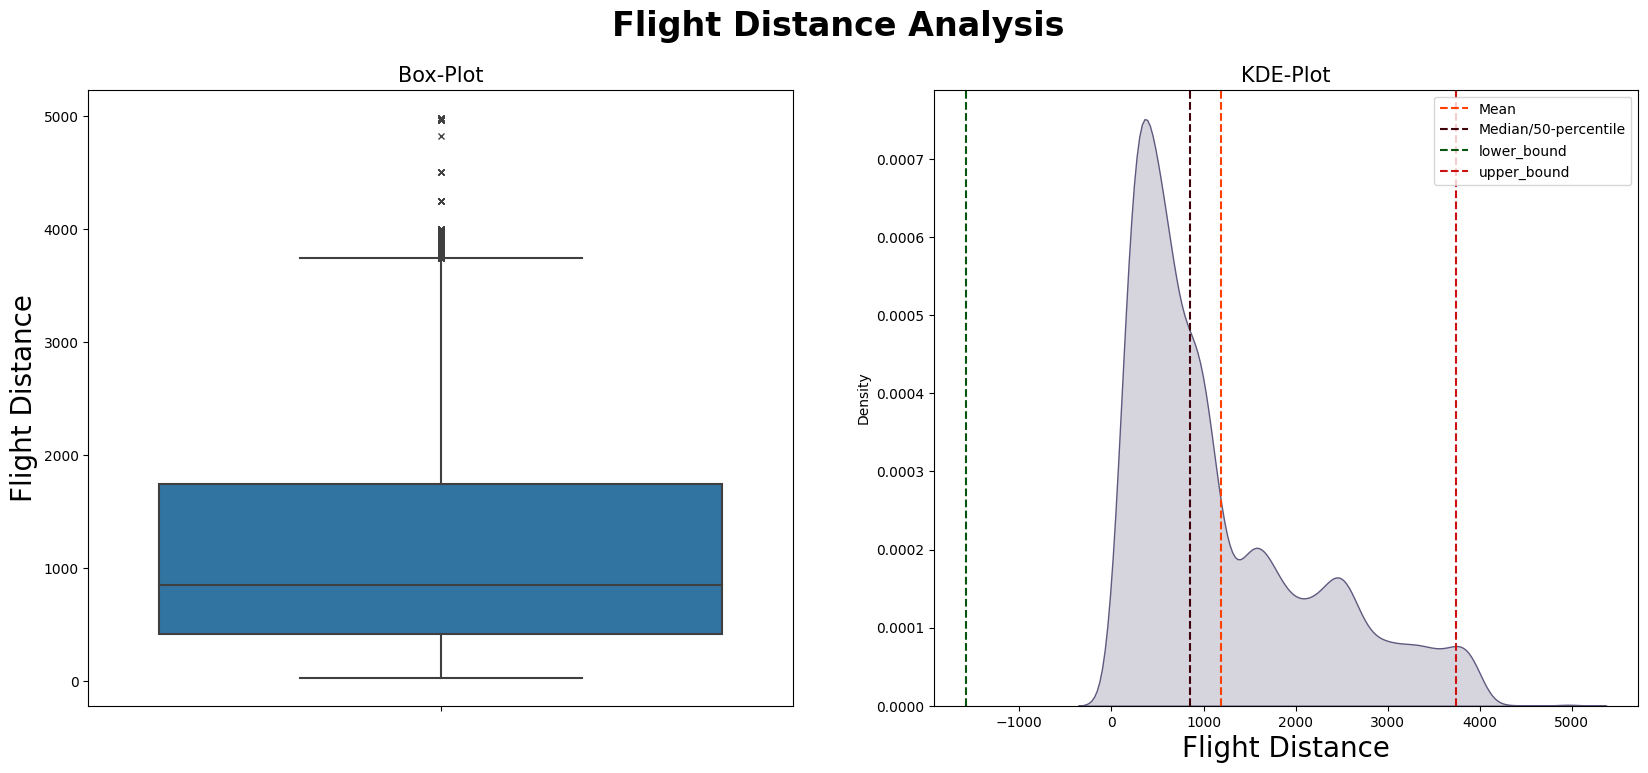

In [91]:
def OutlierDetection(data, col):
    iqr = np.percentile(data[col],75)- np.percentile(data[col], 25)
    lower_bound = np.percentile(data[col], 25) - (1.5 * iqr)
    upper_bound = np.percentile(data[col], 75) + (1.5 * iqr)

#figure: bx-plot and kde-plot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))
col='Flight Distance'
plt.suptitle(col+' Analysis',fontsize=24,weight='bold')
ax1.set_title('Box-Plot',fontsize=15)
sns.boxplot(y=col,data = pd.read_csv('/kaggle/input/test-data/test.csv'),ax=ax1,flierprops={"marker":"x"})
#ax1.set_xticklabels(df_per.index,rotation=45)
ax1.set_ylabel(col,fontsize=20)
ax2.set_title('KDE-Plot',fontsize=15)


sns.kdeplot(x=col,data = pd.read_csv('/kaggle/input/test-data/test.csv'),ax=ax2,shade=True,color='#5e597e')
ax2.axvline(df[col].mean(),linestyle="--",color='#ff4000',label='Mean')
ax2.axvline(df[col].median(),linestyle="--",color='#40000a',label='Median/50-percentile')
ax2.axvline(lower_bound,linestyle="--",color="#06550e",label='lower_bound')
ax2.axvline(upper_bound,linestyle="--",color="#cc1111",label='upper_bound')
ax2.legend()
ax2.set_xlabel(col,fontsize=20)
ax2.annotate(f'{upper_bound:0f}',xy=(upper_bound+10,0.04),arrowprops=dict(arrowstyle="->",color='r',alpha=.8),fontsize=20)
plt.show()

OutlierDetection(df,'Departure Delay in Minutes')

In [92]:
percentile_ate_first_view(df,'Departure Delay in Minutes',0,100,10)

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 2
70 percentile value is 8
80 percentile value is 18
90 percentile value is 43
100 percentile value is 1128


In [93]:
percentile_ate_first_view(df,'Departure Delay in Minutes',90,100,1)

90 percentile value is 43
91 percentile value is 47
92 percentile value is 52
93 percentile value is 58
94 percentile value is 66
95 percentile value is 74
96 percentile value is 86
97 percentile value is 100
98 percentile value is 124
99 percentile value is 168
100 percentile value is 1128


In [94]:
percentile_at_third_view(df,'Departure Delay in Minutes')

99.0 percentile value is 168
99.1 percentile value is 179
99.2 percentile value is 187
99.3 percentile value is 198
99.4 percentile value is 209
99.5 percentile value is 224
99.6 percentile value is 243
99.7 percentile value is 266
99.8 percentile value is 302
99.9 percentile value is 383
100 percentile value is 1128


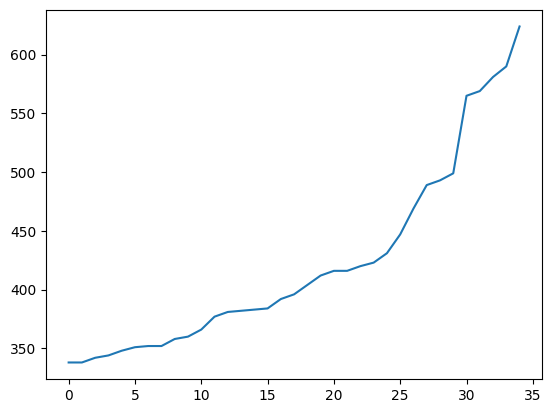

In [95]:
var =df['Departure Delay in Minutes'].values
var =np.sort(var,axis = None)
plt.plot(var[-40:-5])
plt.show()

In [96]:
df[df['Departure Delay in Minutes']>750]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1655,1655,63689,Female,Loyal Customer,39,Business travel,Business,1696,1,4,...,2,1,3,3,1,1,1,951,940.0,neutral or dissatisfied
10072,10072,6062,Female,Loyal Customer,45,Personal Travel,Eco,630,1,4,...,3,4,4,5,5,5,5,794,795.0,neutral or dissatisfied
17429,17429,73482,Male,Loyal Customer,8,Personal Travel,Eco,1144,2,5,...,4,4,3,5,1,3,1,1128,1115.0,neutral or dissatisfied
19000,19000,2247,Female,Loyal Customer,42,Business travel,Business,693,2,1,...,2,5,3,3,2,4,2,815,822.0,neutral or dissatisfied
21907,21907,90926,Female,Loyal Customer,24,Business travel,Business,2507,2,5,...,3,1,3,3,2,3,2,756,748.0,neutral or dissatisfied


In [97]:
OutlierDetection(df,'Arrival Delay in Minutes')

In [98]:
percentile_ate_first_view(df,'Arrival Delay in Minutes',0,100,10)

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 2.0
70 percentile value is 9.0
80 percentile value is 19.0
90 percentile value is 44.0
100 percentile value is 1115.0


In [99]:
percentile_ate_first_view(df,'Departure Delay in Minutes',90,100,1)

90 percentile value is 43
91 percentile value is 47
92 percentile value is 52
93 percentile value is 58
94 percentile value is 66
95 percentile value is 74
96 percentile value is 86
97 percentile value is 100
98 percentile value is 124
99 percentile value is 168
100 percentile value is 1128


In [100]:
percentile_at_third_view(df,'Arrival Delay in Minutes')

99.0 percentile value is 173.0
99.1 percentile value is 182.0
99.2 percentile value is 187.0
99.3 percentile value is 200.0
99.4 percentile value is 210.0
99.5 percentile value is 223.0
99.6 percentile value is 245.0
99.7 percentile value is 273.0
99.8 percentile value is 306.0
99.9 percentile value is 388.0
100 percentile value is 1115.0


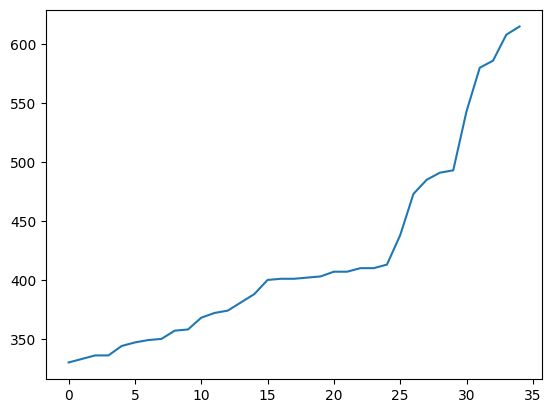

In [101]:
var =df['Arrival Delay in Minutes'].values
var =np.sort(var,axis = None)
plt.plot(var[-40:-5])
plt.show()

In [102]:
df[df['Arrival Delay in Minutes']>545]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1655,1655,63689,Female,Loyal Customer,39,Business travel,Business,1696,1,4,...,2,1,3,3,1,1,1,951,940.0,neutral or dissatisfied
10072,10072,6062,Female,Loyal Customer,45,Personal Travel,Eco,630,1,4,...,3,4,4,5,5,5,5,794,795.0,neutral or dissatisfied
13071,13071,57663,Female,Loyal Customer,45,Personal Travel,Eco,200,3,4,...,3,1,2,1,4,3,4,590,608.0,neutral or dissatisfied
17429,17429,73482,Male,Loyal Customer,8,Personal Travel,Eco,1144,2,5,...,4,4,3,5,1,3,1,1128,1115.0,neutral or dissatisfied
19000,19000,2247,Female,Loyal Customer,42,Business travel,Business,693,2,1,...,2,5,3,3,2,4,2,815,822.0,neutral or dissatisfied
19433,19433,85391,Female,Loyal Customer,47,Business travel,Business,3156,1,1,...,3,4,4,5,5,3,5,581,580.0,satisfied
19795,19795,64495,Female,Loyal Customer,43,Business travel,Business,2306,3,3,...,3,4,5,4,4,3,4,624,615.0,satisfied
21907,21907,90926,Female,Loyal Customer,24,Business travel,Business,2507,2,5,...,3,1,3,3,2,3,2,756,748.0,neutral or dissatisfied
21927,21927,46575,Male,Loyal Customer,69,Business travel,Business,73,2,2,...,2,3,4,3,2,3,2,565,586.0,neutral or dissatisfied


In [103]:
def removal_outlier(data):
    # First, let's know how many rows are there in the dataframe
    a = data.shape[0]
    print("{} are the number of rows we have in our original dataframe".format(a))
    
    # Filter the dataframe to remove outliers
    new_dataframe = data[(data['Flight Distance'] < 3995) & 
                         (data['Departure Delay in Minutes'] < 750) & 
                         (data['Arrival Delay in Minutes'] < 545)]
    
    # Store the rows of the filtered dataframe
    b = new_dataframe.shape[0]
    
    # Print the number of outliers
    print("Number of outliers:", (a - b))
    print("Percentage of data removed:", 100 - (b / a) * 100)
    
    return new_dataframe

new_df=removal_outlier(df)

25893 are the number of rows we have in our original dataframe
Number of outliers: 43
Percentage of data removed: 0.16606804927972973


In [104]:
df['Arrival Delay in Minutes'].isna().sum()
df['Arrival Delay in Minutes'].fillna(value=df['Arrival Delay in Minutes'].median(),inplace=True)
df.isnull().sum()

/tmp/ipykernel_30/969636688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(value=df['Arrival Delay in Minutes'].median(),inplace=True)


Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [105]:
new_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [106]:
 df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [107]:
df_final = pd.read_csv('/kaggle/input/test-data/test.csv') 
target_dict={'neutra or dissatisfied':0,
             'satisfied':1}
df_final['satisfaction']=df_final['satisfaction'].map(target_dict)



<Axes: >

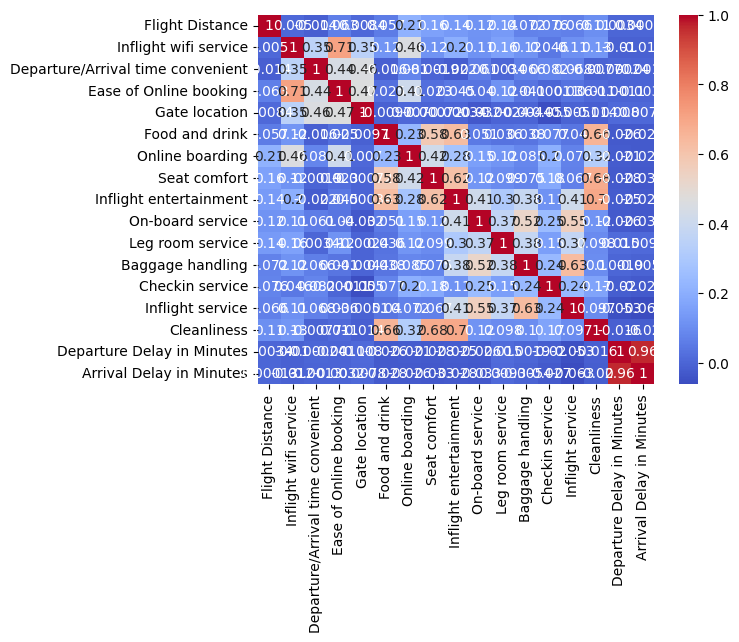

In [109]:
import seaborn as sns

cmap = "coolwarm"  # You can choose any colormap you prefer
sns.heatmap(df_final[valid_columns].corr(), annot=True, cmap=cmap)


<Axes: >

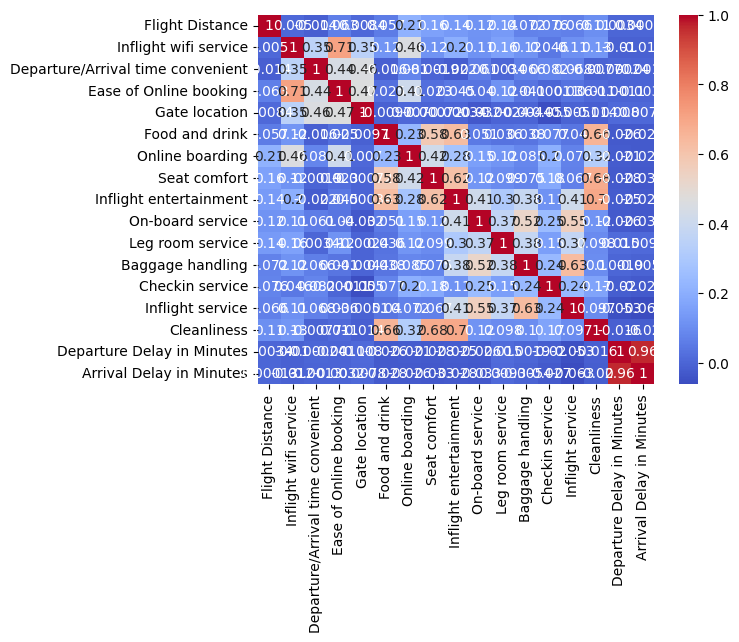

In [110]:
columns = ['Flight Distance', 'Inflight wifi service',
           'Departure/Arrival time convenient', 'Ease of Online booking',
           'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
           'Inflight entertainment', 'On-board service', 'Leg room service',
           'Baggage handling', 'Checkin service', 'Inflight service',
           'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Satisfaction']

# Ensure only existing columns are selected
valid_columns = [col for col in columns if col in df_final.columns]

sns.heatmap(df_final[valid_columns].corr(), annot=True, cmap=cmap)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label={}
for col in df_final.select_dtypes(include=['object']).columns:
    #print(col)
    label[col]=LabelEncoder()
    df_final[col]=label[col].fit_transform(df_final[col])

In [ ]:
df_final.head()

In [ ]:
df_final=df_final.iloc[:,2:]
df_final.head()

In [ ]:
print(Y.isnull().sum())


In [ ]:
Y = Y.fillna(Y.mean())  # or Y.fillna(Y.mode()[0]) for mode, or other strategies


In [ ]:
from sklearn.model_selection import train_test_split

X=df_final.loc[:,:'Arrival Delay in Minutes']
df_final_cleaned = df_final.dropna(subset=['satisfaction'])
X = df_final_cleaned.drop(columns=['satisfaction'])
Y = df_final_cleaned['satisfaction']

#split the data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaling to the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform here to avoid fitting again


# Evaluation Metrices
* Accuracy
* Confusion Table
* F1
* Precision
* Recall
* ROC-AUC
* Log-Loss

In [ ]:
import pandas as pd
filename = df = pd.read_csv('/kaggle/input/test-data/test.csv')
df = pd.read_csv("/kaggle/input/test-data/test.csv")
df.head()

In [ ]:
try:
    df = pd.read_csv('/kaggle/input/test-data/test.csv')  # Update path if necessary
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")

In [ ]:
print("Missing values:\n", df.isnull().sum())


In [ ]:
df = df.dropna()

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
if 'Satisfaction' in categorical_cols:
    categorical_cols.remove('Satisfaction')

In [ ]:
print(df.columns)


In [ ]:
print(categorical_cols)


In [ ]:
missing_cols = [col for col in categorical_cols if col not in df.columns]
if missing_cols:
    print("Missing columns:", missing_cols)
else:
    print("All categorical columns are present in df.")


In [ ]:
categorical_cols = [col for col in categorical_cols if col in df.columns]


In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [ ]:
if 'Satisfaction' in numerical_cols:
    numerical_cols.remove('Satisfaction')

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
print("Columns in DataFrame:", df.columns)

In [ ]:
target_column = 'Satisfaction_satisfied'  # Replace with the actual column name if different

# Set up X and y with the identified target column
if target_column in df.columns:
    y = df[target_column]
    X = df.drop(target_column, axis=1)
else:
    print(f"Target column '{target_column}' not found in the DataFrame.")

In [ ]:
import re

# Find any column that contains 'Satisfaction'
satisfaction_columns = [col for col in df.columns if re.search("Satisfaction", col, re.IGNORECASE)]
print("Satisfaction-related columns found:", satisfaction_columns)

# Use the identified target column if only one match is found
if len(satisfaction_columns) == 1:
    target_column = satisfaction_columns[0]
    y = df[target_column]
    X = df.drop(target_column, axis=1)
else:
    print("Check satisfaction-related columns:", satisfaction_columns)


In [ ]:
X = df.drop('satisfaction_satisfied', axis=1)
y = df['satisfaction_satisfied']


In [ ]:
y = pd.get_dummies(y, drop_first=True)  # Binary encoding if 'Satisfaction' has categories like 'satisfied', 'dissatisfied'
y = y.values.ravel()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples required at a leaf node
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,                    # 3-fold cross-validation
    scoring='accuracy',      # Evaluation metric
    n_jobs=-1,               # Use all available cores
    verbose=2                # Display progress of GridSearch
)

In [ ]:
print("Missing values per column:\n", df.isnull().sum())
df = df.dropna()

In [ ]:
from sklearn.impute import SimpleImputer

# Impute NaN values in X_train with the mean of each column
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' if more suitable
X_train_imputed = imputer.fit_transform(X_train)

# Convert back to DataFrame to retain column names
X_train_cleaned = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Verify that NaN values are removed
print("Checking for NaN values in imputed training data...")
print("NaN values in X_train_cleaned:", X_train_cleaned.isnull().values.any())


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Check for NaN values in X_train and y_train
print("Checking for NaN values in training data...")
if X_train.isnull().values.any():
    print("NaN values detected in X_train. Please clean the data before tuning.")
elif pd.Series(y_train).isnull().any():
    print("NaN values detected in y_train. Please clean the data before tuning.")
else:
    print("No NaN values detected in X_train and y_train. Proceeding with hyperparameter tuning.")

    # Initialize the RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    }

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=rf_model,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2,
        error_score='raise'  # Raises errors for any failed fits
    )

    # Run hyperparameter tuning
    print("Starting hyperparameter tuning...")
    try:
        grid_search.fit(X_train, y_train)
        print("Hyperparameter tuning complete.")

        # Retrieve the best parameters and model
        best_params = grid_search.best_params_
        best_rf_model = grid_search.best_estimator_

        print("Best Parameters found:", best_params)
        print("Best Model:", best_rf_model)
    except ValueError as e:
        print("ValueError during hyperparameter tuning:", e)
        print("Check that X_train and y_train are correctly formatted and free of NaNs or incompatible data types.")
    except Exception as e:
        print("An error occurred during hyperparameter tuning:", e)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_cleaned = pd.DataFrame(scaler.fit_transform(X_train_cleaned), columns=X_train.columns)

In [ ]:
X_train_cleaned = pd.get_dummies(X_train_cleaned, drop_first=True)  # Drop first to avoid multicollinearity

In [ ]:
from scipy import stats


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_cleaned = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Step 2: Remove outliers
z_scores = stats.zscore(X_train_cleaned.select_dtypes(include=[np.number]))
X_train_cleaned = X_train_cleaned[(np.abs(z_scores) < 3).all(axis=1)]
y_train_cleaned = y_train[X_train_cleaned.index]  # Keep y_train aligned

# Step 3: Scale features
scaler = StandardScaler()
X_train_cleaned = pd.DataFrame(scaler.fit_transform(X_train_cleaned), columns=X_train_cleaned.columns)

# Step 4: Encode categorical variables
X_train_cleaned = pd.get_dummies(X_train_cleaned, drop_first=True)


[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_sam